<a href="https://colab.research.google.com/github/harishkollana/Ted-Talks-Views-Prediction/blob/main/ted_talks_views_prediction_capstone_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Ted Talk Views Prediction Project by**


---



Okay, before going to start. Let's understand what is this Tedtalks?

TED is devoted to spreading powerful ideas on just about any topic. These datasets contain over
4,000 TED talks including transcripts in many languages.
Founded in 1984 by Richard Salman as a nonprofit organization
that aimed at bringing experts from the fields of Technology, Entertainment, and Design
together, TED Conferences have gone on to become the Mecca of ideas from virtually all
walks of life. As of 2015, TED and its sister TEDx chapters have published more than 2000
talks for free consumption by the masses and its speaker list boasts of the likes of Al Gore,
Jimmy Wales, Shahrukh Khan, and Bill Gates.
The main objective is to build a predictive model, which could help in predicting the views of
the videos uploaded on the TEDx website.


---

**Dataset Information**


*   Number of instances: 4,005
*   Number of attributes: 19


---



**Features information:**

The dataset contains features like:

* talk_id: Talk identification number provided by TED
* title: Title of the talk
* speaker_1: First speaker in TED's speaker list
* all_speakers: Speakers in the talk
* occupations: Occupations of the speakers
* about_speakers: Blurb about each speaker
* recorded_date: Date the talk was recorded
* published_date: Date the talk was published to TED.com
* event: Event or medium in which the talk was given
* native_lang: Language the talk was given in
* available_lang: All available languages (lang_code) for a talk
* comments: Count of comments
* duration: Duration in seconds
* topics: Related tags or topics for the talk
* related_talks: Related talks (key='talk_id',value='title')
* url: URL of the talk
* description: Description of the talk
* transcript: Full transcript of the talk



---




**Target Variable :**
* 'views': Count of views


---



**Goal:**

The main objective isto build a model which predicts the views of videos uploaded on the Tedx Youtube Channel based on the past dataset i.e. given to us.

**Breakdown of this Notebook:**

In [ ]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from datetime import datetime
import time
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.neural_network import MLPRegressor
import xgboost as xgb
from sklearn import neighbors
from sklearn.svm import SVR

from sklearn import metrics
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn import ensemble

import warnings
warnings.filterwarnings('ignore')

#import libraries for missing value imputation

from sklearn.impute import MissingIndicator
from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer


C:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [ ]:
#load data
df = pd.read_csv('data_ted_talks.csv')

In [ ]:
#check data
df.head()

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript
0,1,Averting the climate crisis,Al Gore,{0: 'Al Gore'},{0: ['climate advocate']},{0: 'Nobel Laureate Al Gore focused the world’...,3523392,2006-02-25,2006-06-27,TED2006,en,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",272.0,977,"['alternative energy', 'cars', 'climate change...","{243: 'New thinking on the climate crisis', 54...",https://www.ted.com/talks/al_gore_averting_the...,With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre..."
1,92,The best stats you've ever seen,Hans Rosling,{0: 'Hans Rosling'},{0: ['global health expert; data visionary']},"{0: 'In Hans Rosling’s hands, data sings. Glob...",14501685,2006-02-22,2006-06-27,TED2006,en,"['ar', 'az', 'bg', 'bn', 'bs', 'cs', 'da', 'de...",628.0,1190,"['Africa', 'Asia', 'Google', 'demo', 'economic...","{2056: ""Own your body's data"", 2296: 'A visual...",https://www.ted.com/talks/hans_rosling_the_bes...,You've never seen data presented like this. Wi...,"About 10 years ago, I took on the task to teac..."
2,7,Simplicity sells,David Pogue,{0: 'David Pogue'},{0: ['technology columnist']},{0: 'David Pogue is the personal technology co...,1920832,2006-02-24,2006-06-27,TED2006,en,"['ar', 'bg', 'de', 'el', 'en', 'es', 'fa', 'fr...",124.0,1286,"['computers', 'entertainment', 'interface desi...","{1725: '10 top time-saving tech tips', 2274: '...",https://www.ted.com/talks/david_pogue_simplici...,New York Times columnist David Pogue takes aim...,"(Music: ""The Sound of Silence,"" Simon & Garfun..."
3,53,Greening the ghetto,Majora Carter,{0: 'Majora Carter'},{0: ['activist for environmental justice']},{0: 'Majora Carter redefined the field of envi...,2664069,2006-02-26,2006-06-27,TED2006,en,"['ar', 'bg', 'bn', 'ca', 'cs', 'de', 'en', 'es...",219.0,1116,"['MacArthur grant', 'activism', 'business', 'c...",{1041: '3 stories of local eco-entrepreneurshi...,https://www.ted.com/talks/majora_carter_greeni...,"In an emotionally charged talk, MacArthur-winn...",If you're here today — and I'm very happy that...
4,66,Do schools kill creativity?,Sir Ken Robinson,{0: 'Sir Ken Robinson'},"{0: ['author', 'educator']}","{0: ""Creativity expert Sir Ken Robinson challe...",65051954,2006-02-25,2006-06-27,TED2006,en,"['af', 'ar', 'az', 'be', 'bg', 'bn', 'ca', 'cs...",4931.0,1164,"['children', 'creativity', 'culture', 'dance',...","{865: 'Bring on the learning revolution!', 173...",https://www.ted.com/talks/sir_ken_robinson_do_...,Sir Ken Robinson makes an entertaining and pro...,Good morning. How are you? (Audience) Good. It...


In [ ]:
#check data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4005 entries, 0 to 4004
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   talk_id         4005 non-null   int64  
 1   title           4005 non-null   object 
 2   speaker_1       4005 non-null   object 
 3   all_speakers    4001 non-null   object 
 4   occupations     3483 non-null   object 
 5   about_speakers  3502 non-null   object 
 6   views           4005 non-null   int64  
 7   recorded_date   4004 non-null   object 
 8   published_date  4005 non-null   object 
 9   event           4005 non-null   object 
 10  native_lang     4005 non-null   object 
 11  available_lang  4005 non-null   object 
 12  comments        3350 non-null   float64
 13  duration        4005 non-null   int64  
 14  topics          4005 non-null   object 
 15  related_talks   4005 non-null   object 
 16  url             4005 non-null   object 
 17  description     4005 non-null   o

In [ ]:
#check unique values
df.nunique()

talk_id           4005
title             4005
speaker_1         3274
all_speakers      3306
occupations       2049
about_speakers    2977
views             3996
recorded_date     1334
published_date    2962
event              459
native_lang         12
available_lang    3902
comments           601
duration          1188
topics            3977
related_talks     4005
url               4005
description       4005
transcript        4005
dtype: int64

In [ ]:
#check duplicates
df.duplicated().sum()

0

In [ ]:
#check summary statistics
df.describe()


,talk_id,views,comments,duration
count,4005.000000,4.005000e+03,3350.000000,4005.000000
mean,12432.538327,2.148006e+06,161.997015,724.011236
std,17447.576262,3.451226e+06,268.838922,361.775462
min,1.000000,0.000000e+00,0.000000,60.000000
25%,1252.000000,8.820690e+05,38.000000,393.000000
50%,2333.000000,1.375508e+06,89.000000,738.000000
75%,23777.000000,2.133110e+06,188.000000,974.000000
max,62794.000000,6.505195e+07,6449.000000,3922.000000


In [ ]:
#check missing values
df.isnull().sum()

talk_id             0
title               0
speaker_1           0
all_speakers        4
occupations       522
about_speakers    503
views               0
recorded_date       1
published_date      0
event               0
native_lang         0
available_lang      0
comments          655
duration            0
topics              0
related_talks       0
url                 0
description         0
transcript          0
dtype: int64

In [ ]:
#print skewness and kurtosis
print(df.skew())
print(df.kurt())

talk_id     1.421452
views       8.185744
comments    8.865357
duration    1.185608
dtype: float64
talk_id       0.740040
views        98.737918
comments    143.035387
duration      6.849223
dtype: float64


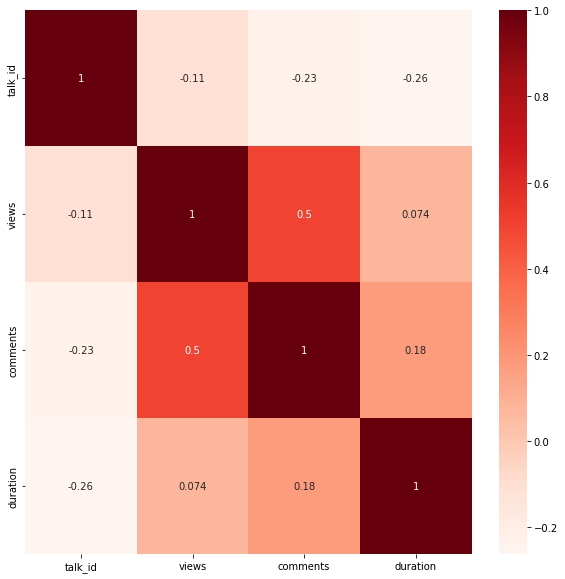

In [ ]:
#check correlation with heatmap
corr = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, cmap=plt.cm.Reds)
plt.show()


title column

In [ ]:

#importing the wordcloud
from wordcloud import WordCloud,ImageColorGenerator

There are 157160 in the combination of all letters


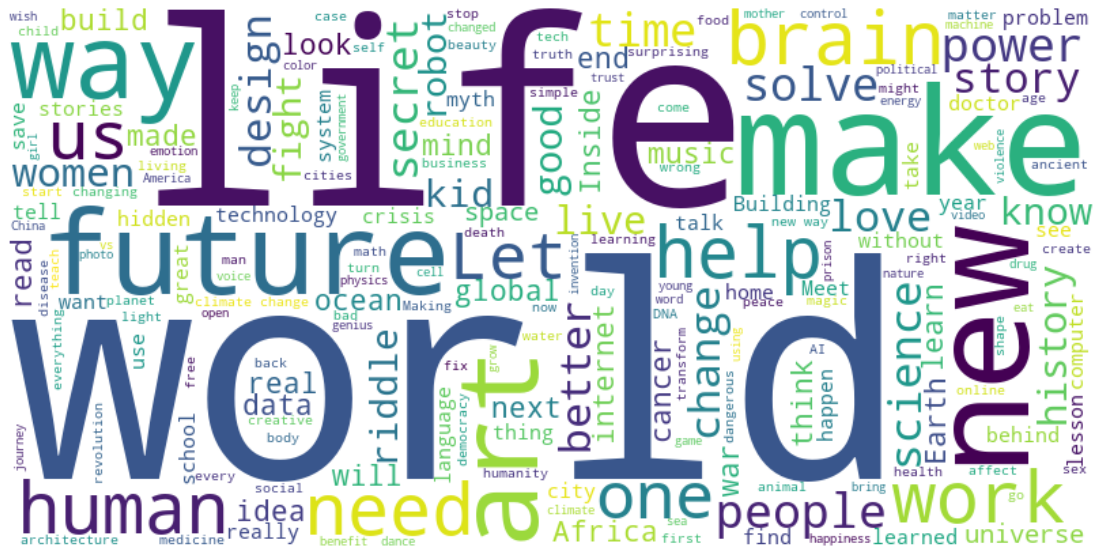

In [ ]:
#convert the title column to string and save it in title_str
title_str = ' '.join(df['title'].values)

#print the length of title_str
print("There are {} in the combination of all letters".format(len(title_str)))

#make a wordcloud of the most common words in the title_str
wordcloud = WordCloud(background_color="white", width=800, height=400).generate(title_str)

#plot the wordcloud
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

title column and speakers column

In [ ]:
#find top 10 most viewed titles vs views with only title,speaker_1 and views columns
df[['title','speaker_1','views']].sort_values(by='views', ascending=False).head(10)

,title,speaker_1,views
4,Do schools kill creativity?,Sir Ken Robinson,65051954
1296,Your body language may shape who you are,Amy Cuddy,57074270
2062,This is what happens when you reply to spam email,James Veitch,56932551
646,How great leaders inspire action,Simon Sinek,49730580
796,The power of vulnerability,Brené Brown,47544833
1724,How to speak so that people want to listen,Julian Treasure,41504331
2108,Inside the mind of a master procrastinator,Tim Urban,37976820
1366,"Looks aren't everything. Believe me, I'm a model.",Cameron Russell,33874546
2724,My philosophy for a happy life,Sam Berns,33691484
1898,The next outbreak? We're not ready,Bill Gates,33521780


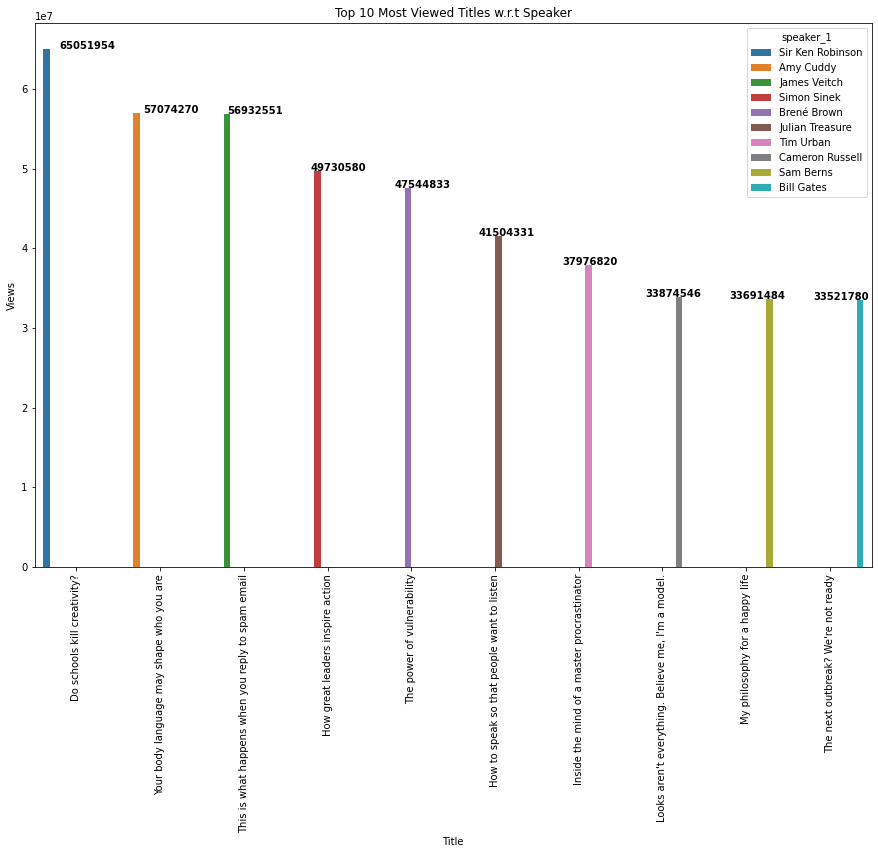

In [ ]:
#set figure size
plt.figure(figsize=(15,10))

# seaborn barplot top 10 most viewed titles vs views with only title,speaker-1 and views columns with title as x-axis and views as y-axis and color as speaker_1
sns.barplot(x='title', y='views', hue='speaker_1', data=df[['title','speaker_1','views']].sort_values(by='views', ascending=False).head(10))

#set bar label
plt.xlabel('Title')
plt.ylabel('Views')

#set hue label
plt.title('Top 10 Most Viewed Titles w.r.t Speaker')

#set x tick label rotation
plt.xticks(rotation=90)

#show view count on top of each bar
for i, v in enumerate(df[['title','speaker_1','views']].sort_values(by='views', ascending=False).head(10)['views']):
    plt.text(i-0.2, v+200, str(v), color='black', fontweight='bold')


plt.show()


popular speaker

In [ ]:
#find top 15 speaker_1 with most number of views
top_15_speak_views = df.groupby('speaker_1').agg({'views' : 'sum'}).nlargest(10,['views']).reset_index()
top_15_speak_views.head()

,speaker_1,views
0,Alex Gendler,117619583
1,Sir Ken Robinson,84380518
2,James Veitch,78843641
3,Simon Sinek,62661183
4,Brené Brown,61285977


<AxesSubplot:title={'center':'Most popular Speaker according to total views on their talks'}, xlabel='speaker_1', ylabel='views'>

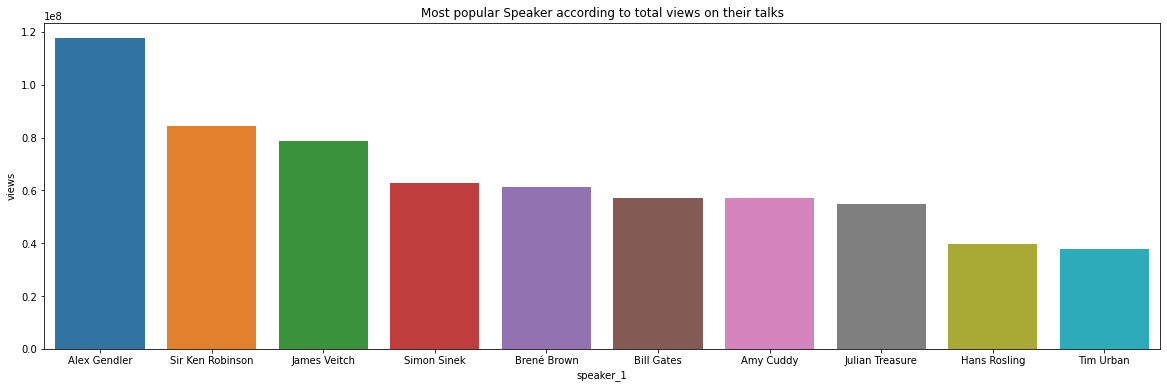

In [ ]:
#printing most popular Speaker according to total views on their talks
plt.figure(figsize=(20,6))
plt.title('Most popular Speaker according to total views on their talks')
sns.barplot(x='speaker_1',y='views',data=top_15_speak_views)

all speakers column

In [ ]:
#extract records with columns title,speaker_1,views and all_speakers
df_all_speakers = df[['title','speaker_1','views','all_speakers']]
df_all_speakers.head()

,title,speaker_1,views,all_speakers
0,Averting the climate crisis,Al Gore,3523392,{0: 'Al Gore'}
1,The best stats you've ever seen,Hans Rosling,14501685,{0: 'Hans Rosling'}
2,Simplicity sells,David Pogue,1920832,{0: 'David Pogue'}
3,Greening the ghetto,Majora Carter,2664069,{0: 'Majora Carter'}
4,Do schools kill creativity?,Sir Ken Robinson,65051954,{0: 'Sir Ken Robinson'}


In [ ]:
#drop missing values in all_speakers column with value 'nan' and all records with missing values in all_speakers column
df_all_speakers.dropna(subset=['all_speakers'], inplace=True)
df_all_speakers.head()

,title,speaker_1,views,all_speakers
0,Averting the climate crisis,Al Gore,3523392,{0: 'Al Gore'}
1,The best stats you've ever seen,Hans Rosling,14501685,{0: 'Hans Rosling'}
2,Simplicity sells,David Pogue,1920832,{0: 'David Pogue'}
3,Greening the ghetto,Majora Carter,2664069,{0: 'Majora Carter'}
4,Do schools kill creativity?,Sir Ken Robinson,65051954,{0: 'Sir Ken Robinson'}


In [ ]:
#check nan values in all_speakers column
df_all_speakers.isnull().sum()

title           0
speaker_1       0
views           0
all_speakers    0
dtype: int64

In [ ]:
#convrt all_speakers column values to dictionary
df_all_speakers['all_speakers'] = df_all_speakers['all_speakers'].apply(lambda x: eval(x))
df_all_speakers

,title,speaker_1,views,all_speakers
0,Averting the climate crisis,Al Gore,3523392,{0: 'Al Gore'}
1,The best stats you've ever seen,Hans Rosling,14501685,{0: 'Hans Rosling'}
2,Simplicity sells,David Pogue,1920832,{0: 'David Pogue'}
3,Greening the ghetto,Majora Carter,2664069,{0: 'Majora Carter'}
4,Do schools kill creativity?,Sir Ken Robinson,65051954,{0: 'Sir Ken Robinson'}
...,...,...,...,...
4000,"Crisis support for the world, one text away",Nancy Lublin,502934,{0: 'Nancy Lublin'}
4001,The dark history of IQ tests,Stefan C Dombrowski,307187,{0: 'Stefan C Dombrowski'}
4002,"How ""policing for profit"" undermines your rights",Dick M. Carpenter II,464414,{0: 'Dick M. Carpenter II'}
4003,The electrifying speeches of Sojourner Truth,Daina Ramey Berry,56582,{0: 'Daina Ramey Berry'}


In [ ]:
#apply pd.series to all_speakers column
df_all_speakers['all_speakers'].apply(pd.Series)

,0,1,2,3,4
0,Al Gore,NaN,NaN,NaN,NaN
1,Hans Rosling,NaN,NaN,NaN,NaN
2,David Pogue,NaN,NaN,NaN,NaN
3,Majora Carter,NaN,NaN,NaN,NaN
4,Sir Ken Robinson,NaN,NaN,NaN,NaN
...,...,...,...,...,...
4000,Nancy Lublin,NaN,NaN,NaN,NaN
4001,Stefan C Dombrowski,NaN,NaN,NaN,NaN
4002,Dick M. Carpenter II,NaN,NaN,NaN,NaN
4003,Daina Ramey Berry,NaN,NaN,NaN,NaN


In [ ]:
#create a new df and concat the pd.series to all_speakers column
df_all_speakers_new=pd.concat([df_all_speakers.drop(['all_speakers'], axis=1), df_all_speakers['all_speakers'].apply(pd.Series)], axis=1)
df_all_speakers_new.head()

,title,speaker_1,views,0,1,2,3,4
0,Averting the climate crisis,Al Gore,3523392,Al Gore,NaN,NaN,NaN,NaN
1,The best stats you've ever seen,Hans Rosling,14501685,Hans Rosling,NaN,NaN,NaN,NaN
2,Simplicity sells,David Pogue,1920832,David Pogue,NaN,NaN,NaN,NaN
3,Greening the ghetto,Majora Carter,2664069,Majora Carter,NaN,NaN,NaN,NaN
4,Do schools kill creativity?,Sir Ken Robinson,65051954,Sir Ken Robinson,NaN,NaN,NaN,NaN


In [ ]:
#rename column 0 to all_speakers in df_all_speakers_new
df_all_speakers_new.rename(columns={0:'all_speakers'}, inplace=True)
df_all_speakers_new.head()

,title,speaker_1,views,all_speakers,1,2,3,4
0,Averting the climate crisis,Al Gore,3523392,Al Gore,NaN,NaN,NaN,NaN
1,The best stats you've ever seen,Hans Rosling,14501685,Hans Rosling,NaN,NaN,NaN,NaN
2,Simplicity sells,David Pogue,1920832,David Pogue,NaN,NaN,NaN,NaN
3,Greening the ghetto,Majora Carter,2664069,Majora Carter,NaN,NaN,NaN,NaN
4,Do schools kill creativity?,Sir Ken Robinson,65051954,Sir Ken Robinson,NaN,NaN,NaN,NaN


In [ ]:
df_all_speakers_new.columns

Index(['title', 'speaker_1', 'views', 'all_speakers', 1, 2, 3, 4], dtype='object')

In [ ]:
#check data in all_speakers_new column
df_all_speakers_new.head()

,title,speaker_1,views,all_speakers,1,2,3,4
0,Averting the climate crisis,Al Gore,3523392,Al Gore,NaN,NaN,NaN,NaN
1,The best stats you've ever seen,Hans Rosling,14501685,Hans Rosling,NaN,NaN,NaN,NaN
2,Simplicity sells,David Pogue,1920832,David Pogue,NaN,NaN,NaN,NaN
3,Greening the ghetto,Majora Carter,2664069,Majora Carter,NaN,NaN,NaN,NaN
4,Do schools kill creativity?,Sir Ken Robinson,65051954,Sir Ken Robinson,NaN,NaN,NaN,NaN


In [ ]:
#drop columns 1,2,3,4 in df_all_speakers_new
df_all_speakers_new.drop([ 1, 2, 3, 4], axis=1, inplace=True)
df_all_speakers_new.head()

,title,speaker_1,views,all_speakers
0,Averting the climate crisis,Al Gore,3523392,Al Gore
1,The best stats you've ever seen,Hans Rosling,14501685,Hans Rosling
2,Simplicity sells,David Pogue,1920832,David Pogue
3,Greening the ghetto,Majora Carter,2664069,Majora Carter
4,Do schools kill creativity?,Sir Ken Robinson,65051954,Sir Ken Robinson


In [ ]:
#check data in df_all_speakers_new column
df_all_speakers_new.head()

,title,speaker_1,views,all_speakers
0,Averting the climate crisis,Al Gore,3523392,Al Gore
1,The best stats you've ever seen,Hans Rosling,14501685,Hans Rosling
2,Simplicity sells,David Pogue,1920832,David Pogue
3,Greening the ghetto,Majora Carter,2664069,Majora Carter
4,Do schools kill creativity?,Sir Ken Robinson,65051954,Sir Ken Robinson


In [ ]:
#check whether values of speaker_1 column are same as values of all_speakers column and show count of matching records

matching_records =df_all_speakers_new['speaker_1'] == df_all_speakers_new['all_speakers']
matching_records.value_counts()


True    4001
dtype: int64

In [ ]:
#check data info in df_all_speakers_new column
df_all_speakers_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4001 entries, 0 to 4004
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         4001 non-null   object
 1   speaker_1     4001 non-null   object
 2   views         4001 non-null   int64 
 3   all_speakers  4001 non-null   object
dtypes: int64(1), object(3)
memory usage: 156.3+ KB


so all the values in columns of speaker_1 and all_speakers are same. so we can drop that column

occupations column

In [ ]:
#find number of values in occupations column in df
df['occupations']

0                           {0: ['climate advocate']}
1       {0: ['global health expert; data visionary']}
2                       {0: ['technology columnist']}
3         {0: ['activist for environmental justice']}
4                         {0: ['author', 'educator']}
                            ...                      
4000                         {0: ['health activist']}
4001                                              NaN
4002                          {0: ['law researcher']}
4003                                              NaN
4004                                              NaN
Name: occupations, Length: 4005, dtype: object

In [ ]:
#check null values in occupations column
df['occupations'].isnull().sum()

522

In [ ]:
#replacing Nan values of occupations column with other 
for index, row in df.iterrows():
    if pd.isnull(row['occupations']):
        df['occupations'][index] = str({0:'Other'})


In [ ]:
#apply eval function to occupations column
df['occupations'] = df.apply(lambda row: eval(row['occupations']), axis=1)

In [ ]:
#check null values in occupations column
df['occupations'].isnull().sum()

0

In [ ]:
#defining a new feature called occupation
df['occupation'] = 'other'

#for loop to iterate through each row and extracting occupations of speakers
for index, row in df.iterrows():
    occupations_list=list(row['occupations'].values())[0][0]
    df.loc[index,'occupation'] = str(occupations_list)

In [ ]:
#check data in occupation column
df['occupation'].head()

0                        climate advocate
1    global health expert; data visionary
2                    technology columnist
3      activist for environmental justice
4                                  author
Name: occupation, dtype: object

In [ ]:
#check count of unique values in occupation column
df['occupation'].nunique()


1552

In [ ]:
#create a df where ocuuptation column is not o
df_occupation = df[df['occupation']!='O'] 
df_occupation.head()

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript,occupation
0,1,Averting the climate crisis,Al Gore,{0: 'Al Gore'},{0: ['climate advocate']},{0: 'Nobel Laureate Al Gore focused the world’...,3523392,2006-02-25,2006-06-27,TED2006,en,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",272.0,977,"['alternative energy', 'cars', 'climate change...","{243: 'New thinking on the climate crisis', 54...",https://www.ted.com/talks/al_gore_averting_the...,With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre...",climate advocate
1,92,The best stats you've ever seen,Hans Rosling,{0: 'Hans Rosling'},{0: ['global health expert; data visionary']},"{0: 'In Hans Rosling’s hands, data sings. Glob...",14501685,2006-02-22,2006-06-27,TED2006,en,"['ar', 'az', 'bg', 'bn', 'bs', 'cs', 'da', 'de...",628.0,1190,"['Africa', 'Asia', 'Google', 'demo', 'economic...","{2056: ""Own your body's data"", 2296: 'A visual...",https://www.ted.com/talks/hans_rosling_the_bes...,You've never seen data presented like this. Wi...,"About 10 years ago, I took on the task to teac...",global health expert; data visionary
2,7,Simplicity sells,David Pogue,{0: 'David Pogue'},{0: ['technology columnist']},{0: 'David Pogue is the personal technology co...,1920832,2006-02-24,2006-06-27,TED2006,en,"['ar', 'bg', 'de', 'el', 'en', 'es', 'fa', 'fr...",124.0,1286,"['computers', 'entertainment', 'interface desi...","{1725: '10 top time-saving tech tips', 2274: '...",https://www.ted.com/talks/david_pogue_simplici...,New York Times columnist David Pogue takes aim...,"(Music: ""The Sound of Silence,"" Simon & Garfun...",technology columnist
3,53,Greening the ghetto,Majora Carter,{0: 'Majora Carter'},{0: ['activist for environmental justice']},{0: 'Majora Carter redefined the field of envi...,2664069,2006-02-26,2006-06-27,TED2006,en,"['ar', 'bg', 'bn', 'ca', 'cs', 'de', 'en', 'es...",219.0,1116,"['MacArthur grant', 'activism', 'business', 'c...",{1041: '3 stories of local eco-entrepreneurshi...,https://www.ted.com/talks/majora_carter_greeni...,"In an emotionally charged talk, MacArthur-winn...",If you're here today — and I'm very happy that...,activist for environmental justice
4,66,Do schools kill creativity?,Sir Ken Robinson,{0: 'Sir Ken Robinson'},"{0: ['author', 'educator']}","{0: ""Creativity expert Sir Ken Robinson challe...",65051954,2006-02-25,2006-06-27,TED2006,en,"['af', 'ar', 'az', 'be', 'bg', 'bn', 'ca', 'cs...",4931.0,1164,"['children', 'creativity', 'culture', 'dance',...","{865: 'Bring on the learning revolution!', 173...",https://www.ted.com/talks/sir_ken_robinson_do_...,Sir Ken Robinson makes an entertaining and pro...,Good morning. How are you? (Audience) Good. It...,author


<AxesSubplot:>

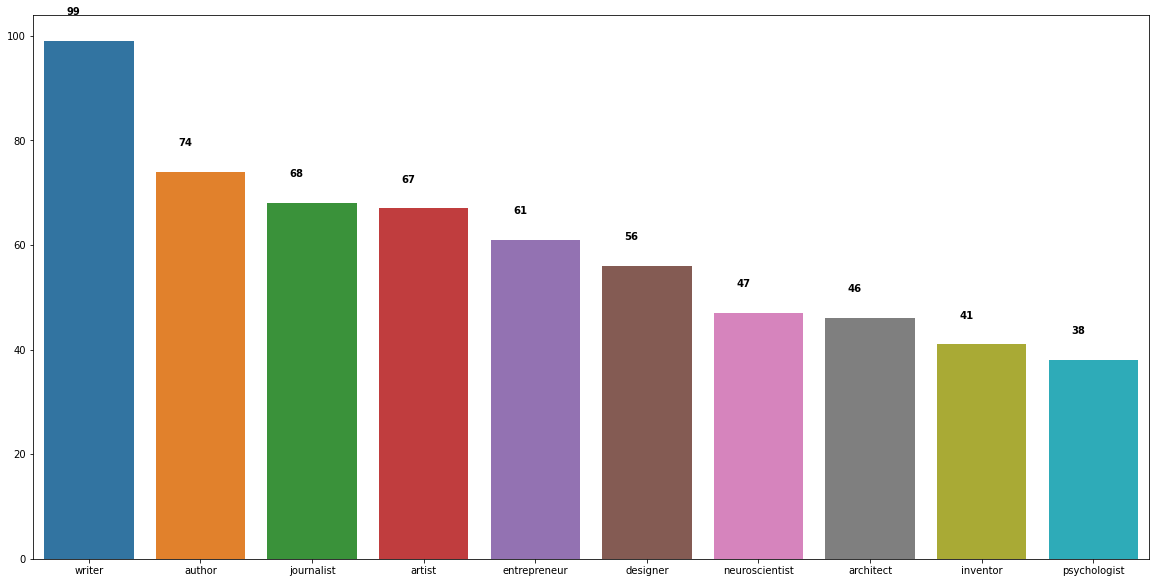

In [ ]:
x=df_occupation['occupation'].value_counts(ascending=False).head(10).index
y=df_occupation['occupation'].value_counts(ascending=False).head(10).values

#set figure size
plt.figure(figsize=(20,10))

#show the values of x in top of each bar
for i, v in enumerate(y):
    plt.text(i-0.2, v+5, str(v), color='black', fontweight='bold')

sns.barplot(x=x, y=y)

In [ ]:
#print ocuuptation column value count of top 10 occupations
df_occupation['occupation'].value_counts(ascending=False).head(10)


writer            99
author            74
journalist        68
artist            67
entrepreneur      61
designer          56
neuroscientist    47
architect         46
inventor          41
psychologist      38
Name: occupation, dtype: int64

There are 55651 words in the combination of all occupations


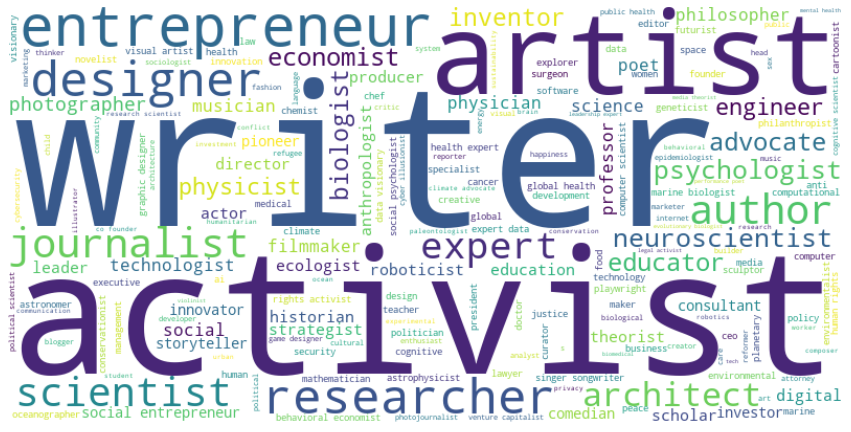

In [ ]:
#convert the topic scolumn to string and save it in occupation_str
occupation_str = ' '.join(df_occupation['occupation'].values.astype(str))

#print the length of topic_str
print("There are {} words in the combination of all occupations".format(len(occupation_str)))

#make a wordcloud of the most common words in the topic_str
wordcloud = WordCloud(background_color="white", width=800, height=400).generate(occupation_str)

#plot the wordcloud
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

published date column

In [ ]:
#apply striptime on published_date column
import datetime
df['published_date'] = df['published_date'].apply(lambda x: datetime.datetime.strptime(x,"%Y-%m-%d"))

In [ ]:
#extract year from published_date column and save it as year
df['pub_year'] = df['published_date'].apply(lambda x: x.year)

#extract month from published_date column and save it as month
df['pub_month'] = df['published_date'].apply(lambda x: x.month)

#extract weekday from published_date column and save it as pub_weekday
df['pub_weekday'] = df['published_date'].apply(lambda x: x.weekday())

In [ ]:
df.head()

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,...,duration,topics,related_talks,url,description,transcript,occupation,pub_year,pub_month,pub_weekday
0,1,Averting the climate crisis,Al Gore,{0: 'Al Gore'},{0: ['climate advocate']},{0: 'Nobel Laureate Al Gore focused the world’...,3523392,2006-02-25,2006-06-27,TED2006,...,977,"['alternative energy', 'cars', 'climate change...","{243: 'New thinking on the climate crisis', 54...",https://www.ted.com/talks/al_gore_averting_the...,With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre...",climate advocate,2006,6,1
1,92,The best stats you've ever seen,Hans Rosling,{0: 'Hans Rosling'},{0: ['global health expert; data visionary']},"{0: 'In Hans Rosling’s hands, data sings. Glob...",14501685,2006-02-22,2006-06-27,TED2006,...,1190,"['Africa', 'Asia', 'Google', 'demo', 'economic...","{2056: ""Own your body's data"", 2296: 'A visual...",https://www.ted.com/talks/hans_rosling_the_bes...,You've never seen data presented like this. Wi...,"About 10 years ago, I took on the task to teac...",global health expert; data visionary,2006,6,1
2,7,Simplicity sells,David Pogue,{0: 'David Pogue'},{0: ['technology columnist']},{0: 'David Pogue is the personal technology co...,1920832,2006-02-24,2006-06-27,TED2006,...,1286,"['computers', 'entertainment', 'interface desi...","{1725: '10 top time-saving tech tips', 2274: '...",https://www.ted.com/talks/david_pogue_simplici...,New York Times columnist David Pogue takes aim...,"(Music: ""The Sound of Silence,"" Simon & Garfun...",technology columnist,2006,6,1
3,53,Greening the ghetto,Majora Carter,{0: 'Majora Carter'},{0: ['activist for environmental justice']},{0: 'Majora Carter redefined the field of envi...,2664069,2006-02-26,2006-06-27,TED2006,...,1116,"['MacArthur grant', 'activism', 'business', 'c...",{1041: '3 stories of local eco-entrepreneurshi...,https://www.ted.com/talks/majora_carter_greeni...,"In an emotionally charged talk, MacArthur-winn...",If you're here today — and I'm very happy that...,activist for environmental justice,2006,6,1
4,66,Do schools kill creativity?,Sir Ken Robinson,{0: 'Sir Ken Robinson'},"{0: ['author', 'educator']}","{0: ""Creativity expert Sir Ken Robinson challe...",65051954,2006-02-25,2006-06-27,TED2006,...,1164,"['children', 'creativity', 'culture', 'dance',...","{865: 'Bring on the learning revolution!', 173...",https://www.ted.com/talks/sir_ken_robinson_do_...,Sir Ken Robinson makes an entertaining and pro...,Good morning. How are you? (Audience) Good. It...,author,2006,6,1


In [ ]:
#map weekdays to numbers
weekday_map = {0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}

#map weekday_map to pub_weekday column
df['pub_weekday'] = df['pub_weekday'].map(weekday_map)

In [ ]:
df['pub_weekday']

0        Tuesday
1        Tuesday
2        Tuesday
3        Tuesday
4        Tuesday
          ...   
4000      Monday
4001      Monday
4002     Tuesday
4003    Thursday
4004    Thursday
Name: pub_weekday, Length: 4005, dtype: object

day column

In [ ]:
#checking the day of the month having maximum release date 
freq_pub_day=df[['pub_weekday','views']].groupby('pub_weekday').agg({'views' : 'count'})
freq_pub_day=freq_pub_day.sort_values('views',ascending=False)
freq_pub_day.reset_index(inplace=True)
freq_pub_day

,pub_weekday,views
0,Tuesday,857
1,Thursday,832
2,Friday,789
3,Monday,727
4,Wednesday,703
5,Sunday,55
6,Saturday,42


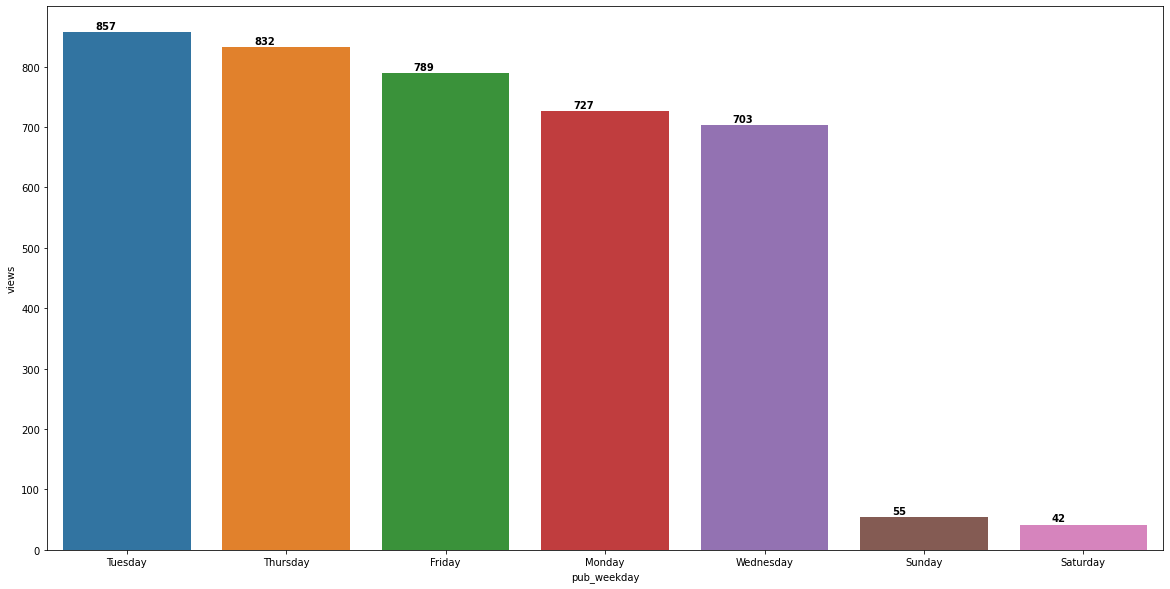

In [ ]:
#create a bar plot of the day of the month having maximum release date
plt.figure(figsize=(20,10))
sns.barplot(x=freq_pub_day['pub_weekday'], y=freq_pub_day['views'])

#show thw count of views at the top of each bar
for i, v in enumerate(freq_pub_day['views']):
    plt.text(i-0.2, v+5, str(v), color='black', fontweight='bold')


Pub_weekday w.r.t Average Views

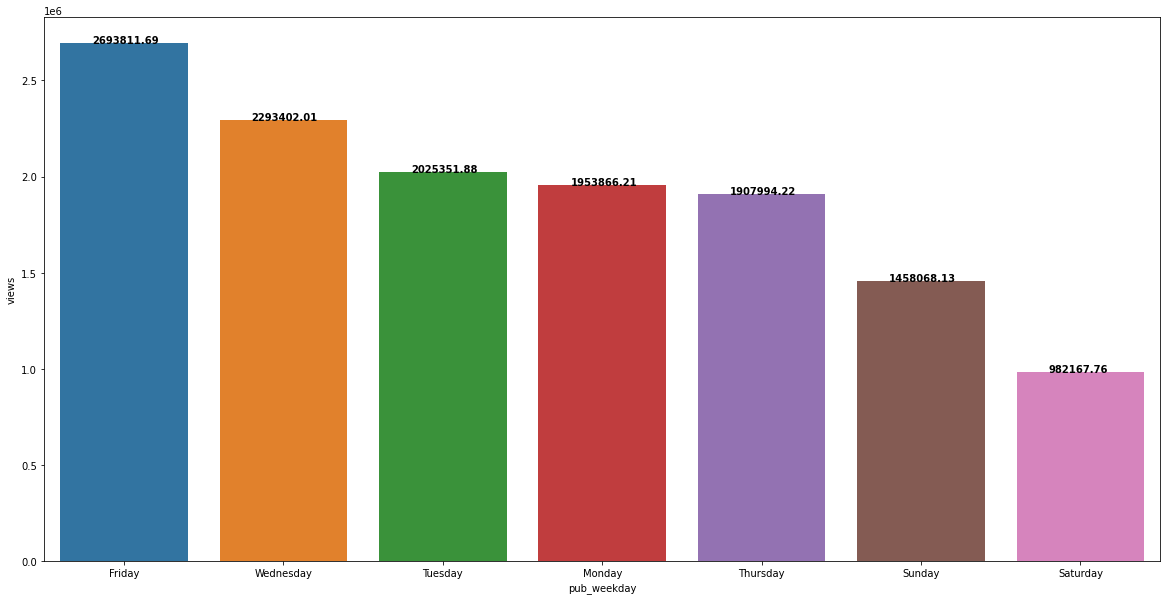

In [ ]:
#create a df with pub_weekday column and mean of views column
df_pub_weekday_mean = df[['pub_weekday','views']].groupby('pub_weekday').agg({'views' : 'mean'})

#round the mean of views column to 2 decimal places
df_pub_weekday_mean['views'] = df_pub_weekday_mean['views'].round(2)

#sort the df_pub_weekday_mean by mean of views column
df_pub_weekday_mean=df_pub_weekday_mean.sort_values('views',ascending=False)

#reset index of df_pub_weekday_mean
df_pub_weekday_mean.reset_index(inplace=True)

#create a bar plot of the mean of views column
plt.figure(figsize=(20,10))
sns.barplot(x=df_pub_weekday_mean['pub_weekday'], y=df_pub_weekday_mean['views'])

#show the mean of views at the top of each bar
for i, v in enumerate(df_pub_weekday_mean['views']):
    plt.text(i-0.2, v+5, str(v), color='black', fontweight='bold')
    


month column

In [ ]:
#create a dictionary with month number as key and month name as value
month_dict = {1:'Jan',2:'Feb',3:'March',4:'April',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}

#map month_dict to pub_month column
df['pub_month'] = df['pub_month'].map(month_dict)


In [ ]:
#check pub_month column
df['pub_month'].head()

0    June
1    June
2    June
3    June
4    June
Name: pub_month, dtype: object

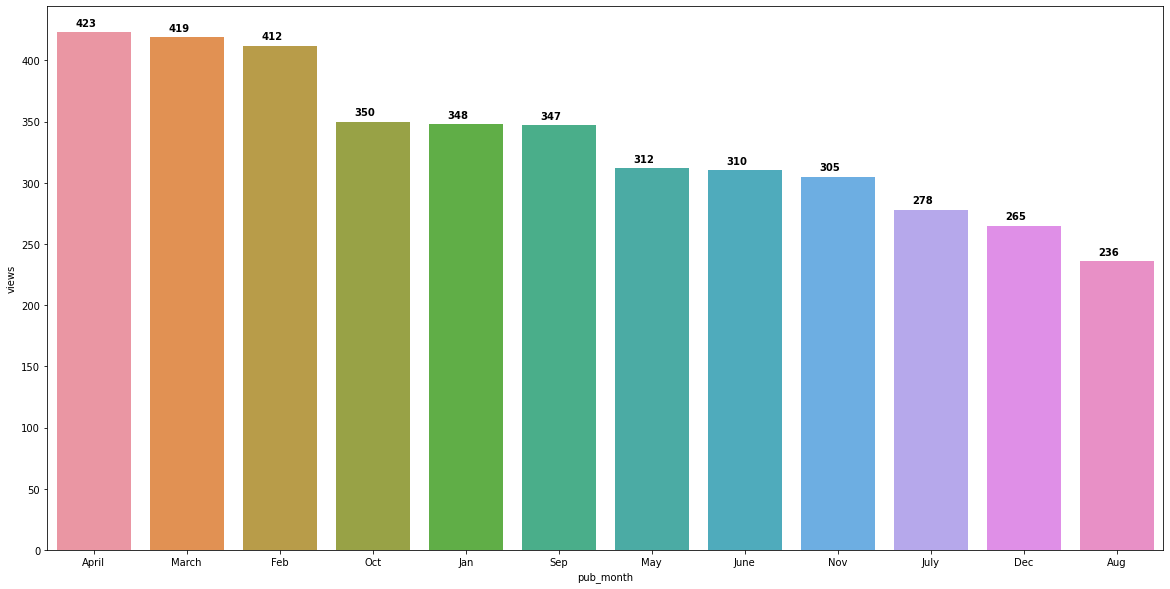

In [ ]:
#create a df with pub_month column and count of views column
df_pub_month_count = df[['pub_month','views']].groupby('pub_month').agg({'views' : 'count'})

#sort the df_pub_month_count by count of views column
df_pub_month_count=df_pub_month_count.sort_values('views',ascending=False)

#reset index of df_pub_month_count
df_pub_month_count.reset_index(inplace=True)

#create a bar plot of the count of views column
plt.figure(figsize=(20,10))
sns.barplot(x=df_pub_month_count['pub_month'], y=df_pub_month_count['views'])

#show the count of views at the top of each bar
for i, v in enumerate(df_pub_month_count['views']):
    plt.text(i-0.2, v+5, str(v), color='black', fontweight='bold')

pub_month w.r.t to average views

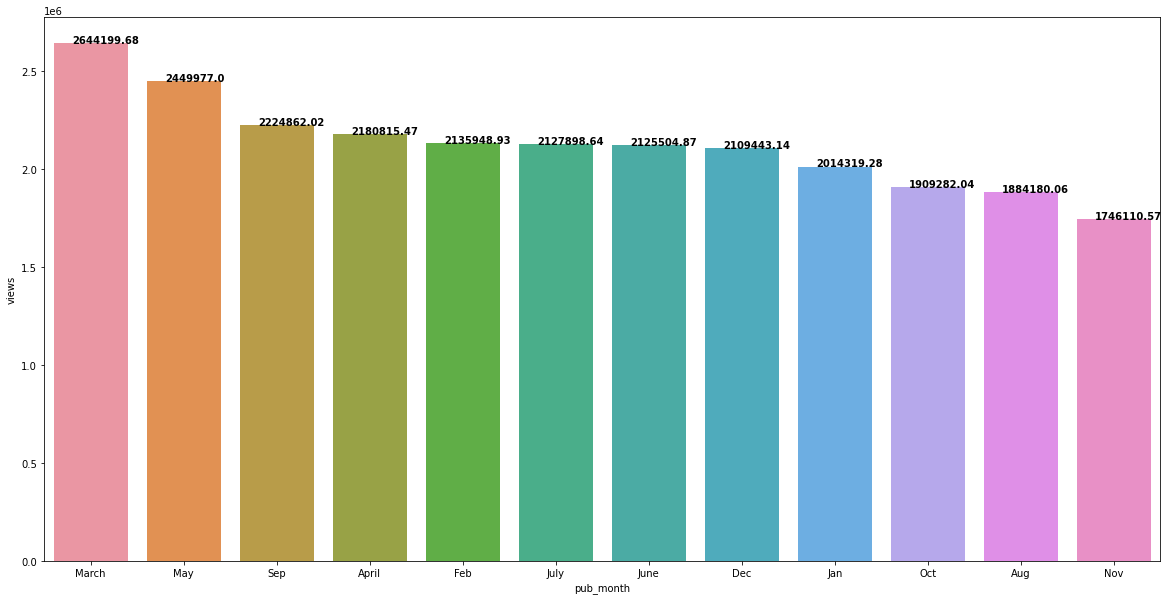

In [ ]:
#create a df with pub_month column and mean of views column
df_pub_month_mean = df[['pub_month','views']].groupby('pub_month').agg({'views' : 'mean'})

#round the mean of views column to 2 decimal places
df_pub_month_mean['views'] = df_pub_month_mean['views'].round(2)

#sort the df_pub_month_mean by mean of views column
df_pub_month_mean=df_pub_month_mean.sort_values('views',ascending=False)

#reset index of df_pub_month_mean
df_pub_month_mean.reset_index(inplace=True)

#create a bar plot of the mean of views column
plt.figure(figsize=(20,10))
sns.barplot(x=df_pub_month_mean['pub_month'], y=df_pub_month_mean['views'])

#show the mean of views at the top of each bar
for i, v in enumerate(df_pub_month_mean['views']):
    plt.text(i-0.2, v+5, str(v), color='black', fontweight='bold')
    

Year Column

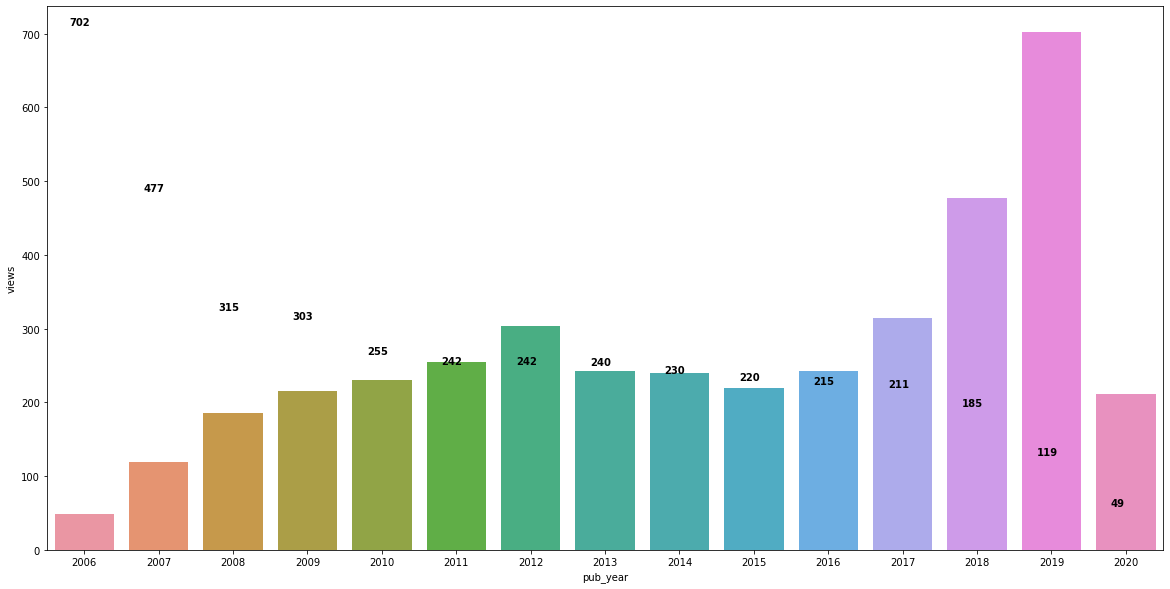

In [ ]:
#create a df with pub_year column and count of views column
df_pub_year_count = df[['pub_year','views']].groupby('pub_year').agg({'views' : 'count'})

#sort the df_pub_year_count by count of views column
df_pub_year_count=df_pub_year_count.sort_values('views',ascending=False)

#reset index of df_pub_year_count
df_pub_year_count.reset_index(inplace=True)

#create a bar plot of the count of views column
plt.figure(figsize=(20,10))
sns.barplot(x=df_pub_year_count['pub_year'], y=df_pub_year_count['views'])

#show the count of views at the top of each bar
for i, v in enumerate(df_pub_year_count['views']):
    plt.text(i-0.2, v+10, str(v), color='black', fontweight='bold')


year avg w.r.t views

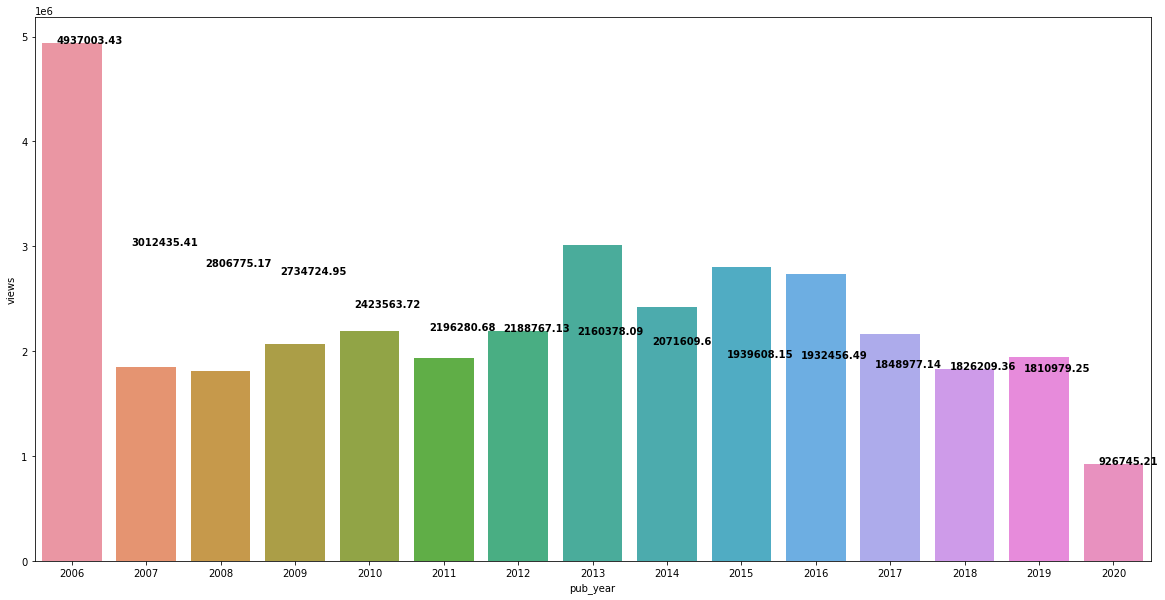

In [ ]:
#create a df with pub_year column and mean of views column
df_pub_year_mean = df[['pub_year','views']].groupby('pub_year').agg({'views' : 'mean'})

#round the mean of views column to 2 decimal places
df_pub_year_mean['views'] = df_pub_year_mean['views'].round(2)

#sort the df_pub_year_mean by mean of views column
df_pub_year_mean=df_pub_year_mean.sort_values('views',ascending=False)

#reset index of df_pub_year_mean
df_pub_year_mean.reset_index(inplace=True)

#create a bar plot of the mean of views column
plt.figure(figsize=(20,10))
sns.barplot(x=df_pub_year_mean['pub_year'], y=df_pub_year_mean['views'])

#show the mean of views at the top of each bar
for i, v in enumerate(df_pub_year_mean['views']):
    plt.text(i-0.2, v+30, str(v), color='black', fontweight='bold')



event column

In [ ]:
#find top 10 event_name with most number of views with column event and views
top_10_event_views = df[['event','views']].groupby('event').agg({'views' : 'count'}).nlargest(10,['views'])
top_10_event_views.reset_index(inplace=True)
top_10_event_views


,event,views
0,TED-Ed,556
1,TED2017,96
2,TED2018,96
3,TED2019,91
4,TED2014,84
5,TED2009,81
6,TED2013,75
7,TED2015,75
8,TED2016,75
9,TED2011,70


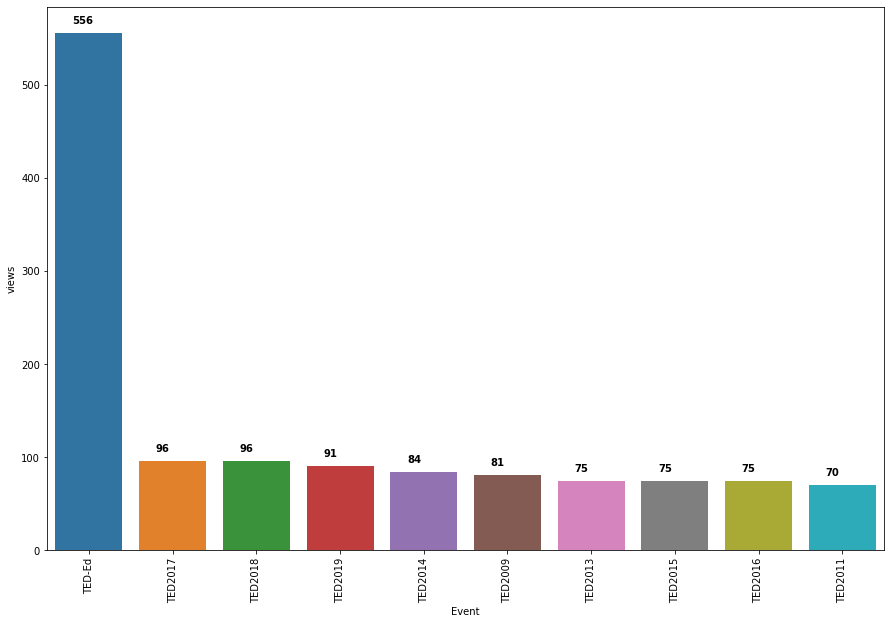

In [ ]:
#set figure size
plt.figure(figsize=(15,10))

# seaborn barplot top 10 values in event column with event as x-axis and views as y-axis and color as event
sns.barplot(x='event', y='views', data=top_10_event_views[['event','views']].sort_values(by='views', ascending=False).head(10))

#set rotation of x-axis labels
plt.xticks(rotation=90)

#set bar label
plt.xlabel('Event')

#show view count on top of each bar
for i, v in enumerate(top_10_event_views[['event','views']].sort_values(by='views', ascending=False).head(10)['views']):
    plt.text(i-0.2, v+10, str(v), color='black', fontweight='bold')


In [ ]:
#find most popular event according to total views on their talks
top_10_pop_event_views = df[['event','views']].groupby('event').agg({'views' : 'sum'}).nlargest(10,['views'])
top_10_pop_event_views.reset_index(inplace=True)
top_10_pop_event_views

,event,views
0,TED-Ed,1145357780
1,TED2015,247702961
2,TED2014,240295871
3,TEDGlobal 2013,235410234
4,TED2017,227847725
5,TED2016,227358612
6,TED2013,225967516
7,TED2012,197746106
8,TED2018,196346377
9,TED2009,191190144


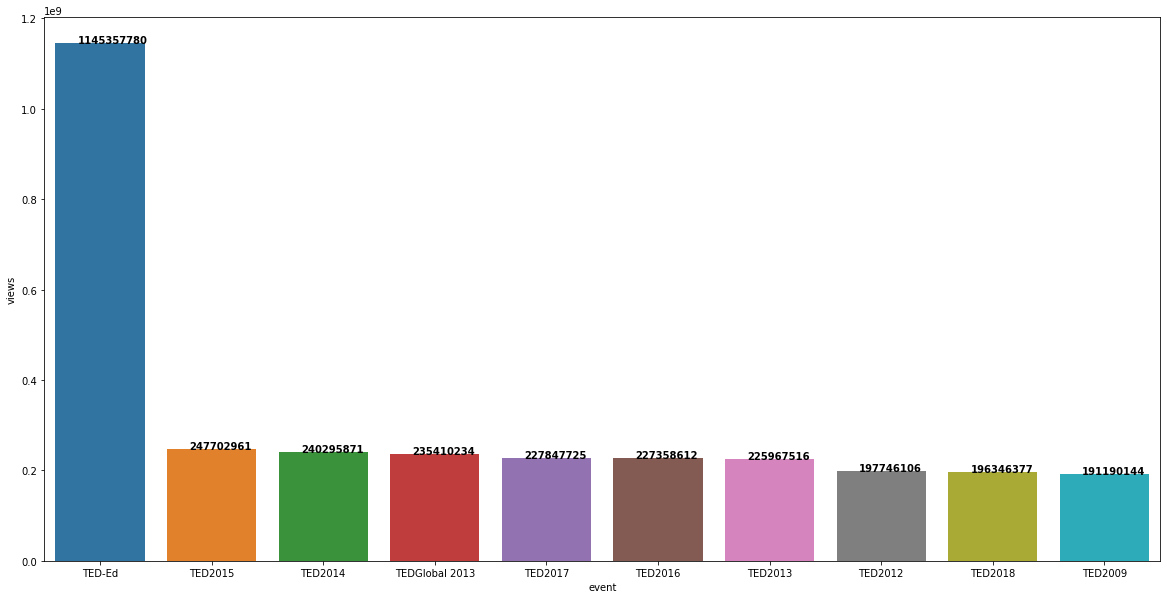

In [ ]:
#set figure size
plt.figure(figsize=(20,10))

# seaborn barplot top 10 values in event column with event as x-axis and views as y-axis
sns.barplot(x='event', y='views', data=top_10_pop_event_views[['event','views']].sort_values(by='views', ascending=False).head(10))

#show view count on top of each bar
for i, v in enumerate(top_10_pop_event_views[['event','views']].sort_values(by='views', ascending=False).head(10)['views']):
    plt.text(i-0.2, v+300, str(v), color='black', fontweight='bold')

In [ ]:
#extract records of native_lang column counts in df
df['native_lang'].value_counts()


en       3957
es         27
fr          9
ja          3
hi          2
de          1
pt          1
ko          1
zh-cn       1
ar          1
pt-br       1
it          1
Name: native_lang, dtype: int64

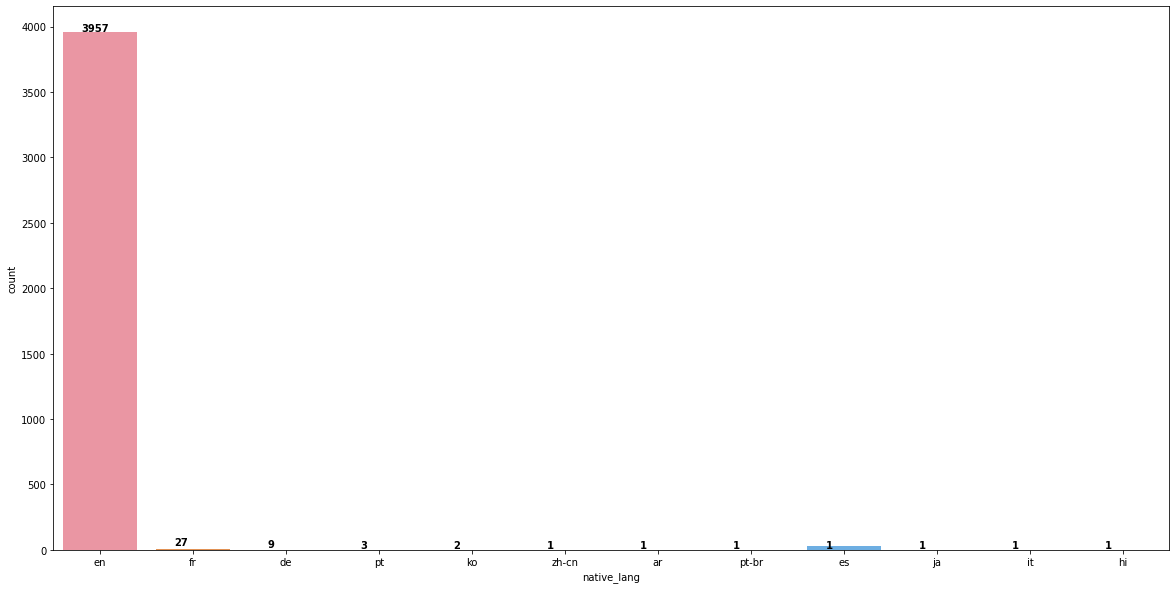

In [ ]:
#plot countplot of native_lang column in df
plt.figure(figsize=(20,10))
sns.countplot(x='native_lang', data=df)

#show count of each language in native_lang column
for i, v in enumerate(df['native_lang'].value_counts()):
    plt.text(i-0.2, v+10, str(v), color='black', fontweight='bold')



topic column

There are 404126 words in the combination of all topics


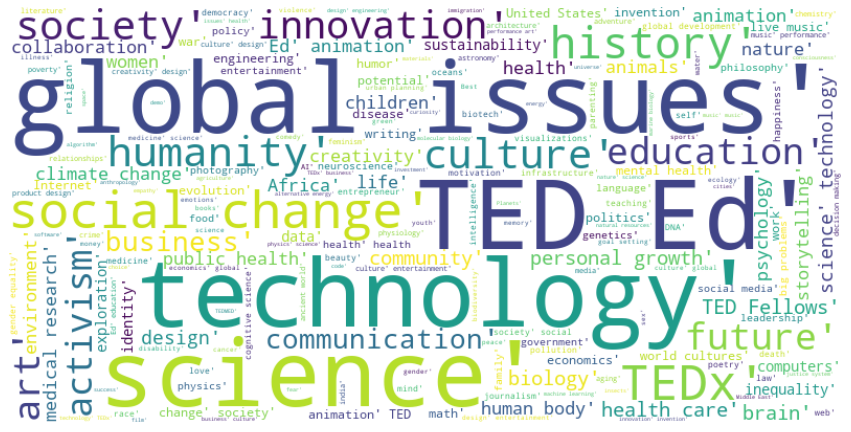

In [ ]:

#convert the topic scolumn to string and save it in title_str
topic_str = ' '.join(df['topics'].values.astype(str))

#print the length of topic_str
print("There are {} words in the combination of all topics".format(len(topic_str)))

#make a wordcloud of the most common words in the topic_str
wordcloud = WordCloud(background_color="white", width=800, height=400).generate(topic_str)

#plot the wordcloud
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

available languages

There are 647690 words in the combination of all available languages


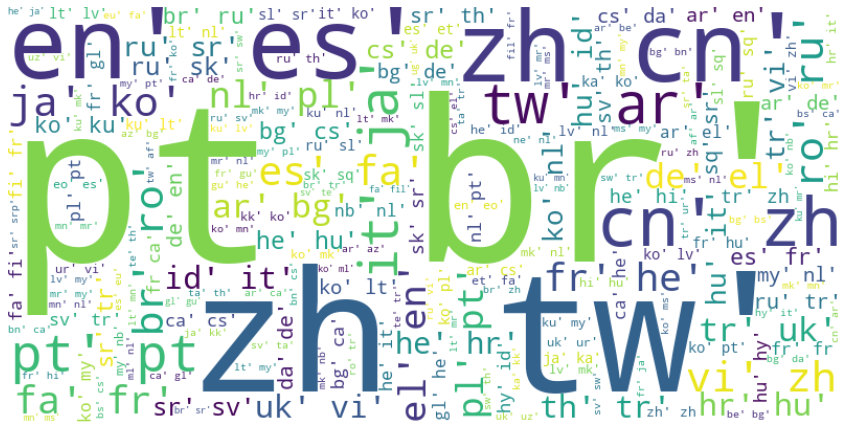

In [ ]:
#convert the available_lang as string and save it in lang_str
lang_str = ' '.join(df['available_lang'].values.astype(str))

#print the length of lang_str
print("There are {} words in the combination of all available languages".format(len(lang_str)))

#make a wordcloud of the most common words in the lang_str
wordcloud = WordCloud(background_color="white", width=800, height=400).generate(lang_str)

#plot the wordcloud
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
#check related_talks column type
df['related_talks'].dtypes

dtype('O')

In [ ]:
#check null values in occupations column
df['related_talks'].isnull().sum()

0

In [ ]:
#apply eval function to occupations column
df['related_talks'] = df.apply(lambda row: eval(row['related_talks']), axis=1)

In [ ]:
#check null values in occupations column
df['related_talks'].isnull().sum()

0

In [ ]:
#check related_talks column 1st row
df['related_talks'].iloc[0]

{243: 'New thinking on the climate crisis',
 547: 'The business logic of sustainability',
 2093: 'The state of the climate — and what we might do about it',
 54715: 'How we can turn the tide on climate',
 29968: 'The most important thing you can do to fight climate change: talk about it',
 2339: "Climate change is happening. Here's how we adapt"}

In [ ]:
related_talks_keys_list=[]
related_talks_values_list=[]


for i in range(0,len(df['related_talks'])):
    related_talks_dict = df['related_talks'].iloc[i]
    for key, value in related_talks_dict.items():
        
        #save the keys as a list
        related_talks_keys_list += list(related_talks_dict.keys())

        #save the values as a list
        related_talks_values_list += list(related_talks_dict.values())
    

In [ ]:
#create a dataframe with related_talks_keys_list as index and related_talks_values_list as values
df_related_talks = pd.DataFrame({'related_talks_keys':related_talks_keys_list,'related_talks_values':related_talks_values_list})

In [ ]:
df_related_talks

,related_talks_keys,related_talks_values
0,243,New thinking on the climate crisis
1,547,The business logic of sustainability
2,2093,The state of the climate — and what we might d...
3,54715,How we can turn the tide on climate
4,29968,The most important thing you can do to fight c...
...,...,...
143092,29159,Inside the killer whale matriarchy
143093,45539,How turtle shells evolved... twice
143094,17733,Let's turn the high seas into the world's larg...
143095,1011,Making law on the high seas


In [ ]:
#create a new df and add df and df_related_talks
df_related_talks_final = pd.concat([df, df_related_talks], axis=1)
df_related_talks_final

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,...,related_talks,url,description,transcript,occupation,pub_year,pub_month,pub_weekday,related_talks_keys,related_talks_values
0,1.0,Averting the climate crisis,Al Gore,{0: 'Al Gore'},{0: ['climate advocate']},{0: 'Nobel Laureate Al Gore focused the world’...,3523392.0,2006-02-25,2006-06-27,TED2006,...,"{243: 'New thinking on the climate crisis', 54...",https://www.ted.com/talks/al_gore_averting_the...,With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre...",climate advocate,2006.0,June,Tuesday,243,New thinking on the climate crisis
1,92.0,The best stats you've ever seen,Hans Rosling,{0: 'Hans Rosling'},{0: ['global health expert; data visionary']},"{0: 'In Hans Rosling’s hands, data sings. Glob...",14501685.0,2006-02-22,2006-06-27,TED2006,...,"{2056: 'Own your body's data', 2296: 'A visual...",https://www.ted.com/talks/hans_rosling_the_bes...,You've never seen data presented like this. Wi...,"About 10 years ago, I took on the task to teac...",global health expert; data visionary,2006.0,June,Tuesday,547,The business logic of sustainability
2,7.0,Simplicity sells,David Pogue,{0: 'David Pogue'},{0: ['technology columnist']},{0: 'David Pogue is the personal technology co...,1920832.0,2006-02-24,2006-06-27,TED2006,...,"{1725: '10 top time-saving tech tips', 2274: '...",https://www.ted.com/talks/david_pogue_simplici...,New York Times columnist David Pogue takes aim...,"(Music: ""The Sound of Silence,"" Simon & Garfun...",technology columnist,2006.0,June,Tuesday,2093,The state of the climate — and what we might d...
3,53.0,Greening the ghetto,Majora Carter,{0: 'Majora Carter'},{0: ['activist for environmental justice']},{0: 'Majora Carter redefined the field of envi...,2664069.0,2006-02-26,2006-06-27,TED2006,...,{1041: '3 stories of local eco-entrepreneurshi...,https://www.ted.com/talks/majora_carter_greeni...,"In an emotionally charged talk, MacArthur-winn...",If you're here today — and I'm very happy that...,activist for environmental justice,2006.0,June,Tuesday,54715,How we can turn the tide on climate
4,66.0,Do schools kill creativity?,Sir Ken Robinson,{0: 'Sir Ken Robinson'},"{0: ['author', 'educator']}","{0: ""Creativity expert Sir Ken Robinson challe...",65051954.0,2006-02-25,2006-06-27,TED2006,...,"{865: 'Bring on the learning revolution!', 173...",https://www.ted.com/talks/sir_ken_robinson_do_...,Sir Ken Robinson makes an entertaining and pro...,Good morning. How are you? (Audience) Good. It...,author,2006.0,June,Tuesday,29968,The most important thing you can do to fight c...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143092,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29159,Inside the killer whale matriarchy
143093,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45539,How turtle shells evolved... twice
143094,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17733,Let's turn the high seas into the world's larg...
143095,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1011,Making law on the high seas


In [ ]:
#drop related_talks column
df_related_talks_final.drop(['related_talks'], axis=1, inplace=True)

In [ ]:
#rename columns of related_talks_keys and related_talks_values
df_related_talks_final.rename(columns={'related_talks_keys':'related_talks_serial','related_talks_values':'related_talks'}, inplace=True)

In [ ]:
# check df_related_talks_final dataframe
df_related_talks_final.head()

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,...,topics,url,description,transcript,occupation,pub_year,pub_month,pub_weekday,related_talks_serial,related_talks
0,1.0,Averting the climate crisis,Al Gore,{0: 'Al Gore'},{0: ['climate advocate']},{0: 'Nobel Laureate Al Gore focused the world’...,3523392.0,2006-02-25,2006-06-27,TED2006,...,"['alternative energy', 'cars', 'climate change...",https://www.ted.com/talks/al_gore_averting_the...,With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre...",climate advocate,2006.0,June,Tuesday,243,New thinking on the climate crisis
1,92.0,The best stats you've ever seen,Hans Rosling,{0: 'Hans Rosling'},{0: ['global health expert; data visionary']},"{0: 'In Hans Rosling’s hands, data sings. Glob...",14501685.0,2006-02-22,2006-06-27,TED2006,...,"['Africa', 'Asia', 'Google', 'demo', 'economic...",https://www.ted.com/talks/hans_rosling_the_bes...,You've never seen data presented like this. Wi...,"About 10 years ago, I took on the task to teac...",global health expert; data visionary,2006.0,June,Tuesday,547,The business logic of sustainability
2,7.0,Simplicity sells,David Pogue,{0: 'David Pogue'},{0: ['technology columnist']},{0: 'David Pogue is the personal technology co...,1920832.0,2006-02-24,2006-06-27,TED2006,...,"['computers', 'entertainment', 'interface desi...",https://www.ted.com/talks/david_pogue_simplici...,New York Times columnist David Pogue takes aim...,"(Music: ""The Sound of Silence,"" Simon & Garfun...",technology columnist,2006.0,June,Tuesday,2093,The state of the climate — and what we might d...
3,53.0,Greening the ghetto,Majora Carter,{0: 'Majora Carter'},{0: ['activist for environmental justice']},{0: 'Majora Carter redefined the field of envi...,2664069.0,2006-02-26,2006-06-27,TED2006,...,"['MacArthur grant', 'activism', 'business', 'c...",https://www.ted.com/talks/majora_carter_greeni...,"In an emotionally charged talk, MacArthur-winn...",If you're here today — and I'm very happy that...,activist for environmental justice,2006.0,June,Tuesday,54715,How we can turn the tide on climate
4,66.0,Do schools kill creativity?,Sir Ken Robinson,{0: 'Sir Ken Robinson'},"{0: ['author', 'educator']}","{0: ""Creativity expert Sir Ken Robinson challe...",65051954.0,2006-02-25,2006-06-27,TED2006,...,"['children', 'creativity', 'culture', 'dance',...",https://www.ted.com/talks/sir_ken_robinson_do_...,Sir Ken Robinson makes an entertaining and pro...,Good morning. How are you? (Audience) Good. It...,author,2006.0,June,Tuesday,29968,The most important thing you can do to fight c...


There are 13 words in the combination of all letters


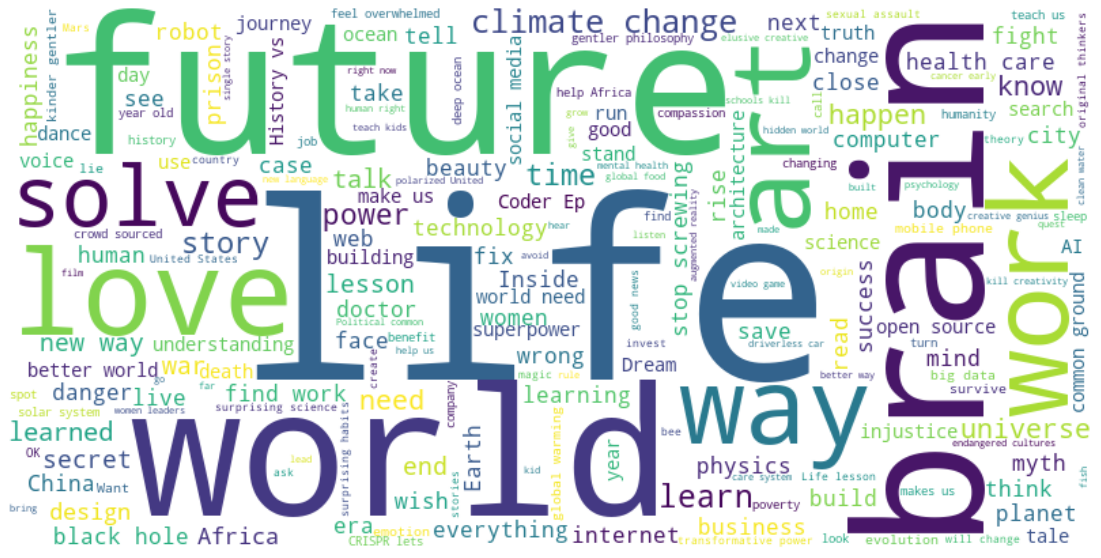

In [ ]:
#convert the related_talks column to string and save it in rt_str
rt_str = ' '.join(df_related_talks_final['related_talks'].values)

#print the length of title_str
print("There are {} words in the combination of all letters".format(len('related_talks')))

#make a wordcloud of the most common words in the title_str
wordcloud = WordCloud(background_color="white", width=800, height=400).generate(rt_str)

#plot the wordcloud
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

title column and speakers column

In [ ]:
#find top 10 most viewed related_talks vs views with only title,speaker_1 and views columns
df_related_talks_final[['related_talks','speaker_1','views']].sort_values(by='views', ascending=False).head(10)

,related_talks,speaker_1,views
4,The most important thing you can do to fight c...,Sir Ken Robinson,65051954.0
1296,Inside the world's deepest caves,Amy Cuddy,57074270.0
2062,"Once upon a time, my mother ...",James Veitch,56932551.0
646,Creative houses from reclaimed stuff,Simon Sinek,49730580.0
796,3 ways to build a happy marriage and avoid div...,Brené Brown,47544833.0
1724,How the news distorts our worldview,Julian Treasure,41504331.0
2108,Designing objects that tell stories,Tim Urban,37976820.0
1366,My trek to the South Pole,Cameron Russell,33874546.0
2724,"""Thula Mama""",Sam Berns,33691484.0
1898,Where is home?,Bill Gates,33521780.0


In [ ]:
#check any duplicates in related_talks column
df_related_talks_final['related_talks'].duplicated().sum()

139275

In [ ]:
#df_related_talks value counts
df_related_talks_final['related_talks'].value_counts()

How to find work you love                              484
How to stop screwing yourself over                     311
We need to talk about an injustice                     246
A kinder, gentler philosophy of success                228
It's OK to feel overwhelmed. Here's what to do next    210
                                                      ... 
"Chromatic"                                              3
"Autopilote" / "Pumper"                                  3
The "dead zone" of the Gulf of Mexico                    3
Food revolutionaries                                     3
Go ahead, dream about the future                         2
Name: related_talks, Length: 3822, dtype: int64

In [ ]:
#let's find the most frequent related talks categories
freq_talks_df=pd.DataFrame(df_related_talks_final['related_talks'].value_counts()).reset_index().nlargest(10, 'related_talks')
freq_talks_df

,index,related_talks
0,How to find work you love,484
1,How to stop screwing yourself over,311
2,We need to talk about an injustice,246
3,"A kinder, gentler philosophy of success",228
4,It's OK to feel overwhelmed. Here's what to do...,210
5,The surprising habits of original thinkers,189
6,Political common ground in a polarized United ...,185
7,The surprising science of happiness,180
8,Your elusive creative genius,177
9,Do schools kill creativity?,174


In [ ]:
#rename the columns
freq_talks_df.rename(columns={'related_talks':'count'}, inplace=True)
freq_talks_df.rename(columns={'index':'related_talks'}, inplace=True)


freq_talks_df

,related_talks,count
0,How to find work you love,484
1,How to stop screwing yourself over,311
2,We need to talk about an injustice,246
3,"A kinder, gentler philosophy of success",228
4,It's OK to feel overwhelmed. Here's what to do...,210
5,The surprising habits of original thinkers,189
6,Political common ground in a polarized United ...,185
7,The surprising science of happiness,180
8,Your elusive creative genius,177
9,Do schools kill creativity?,174


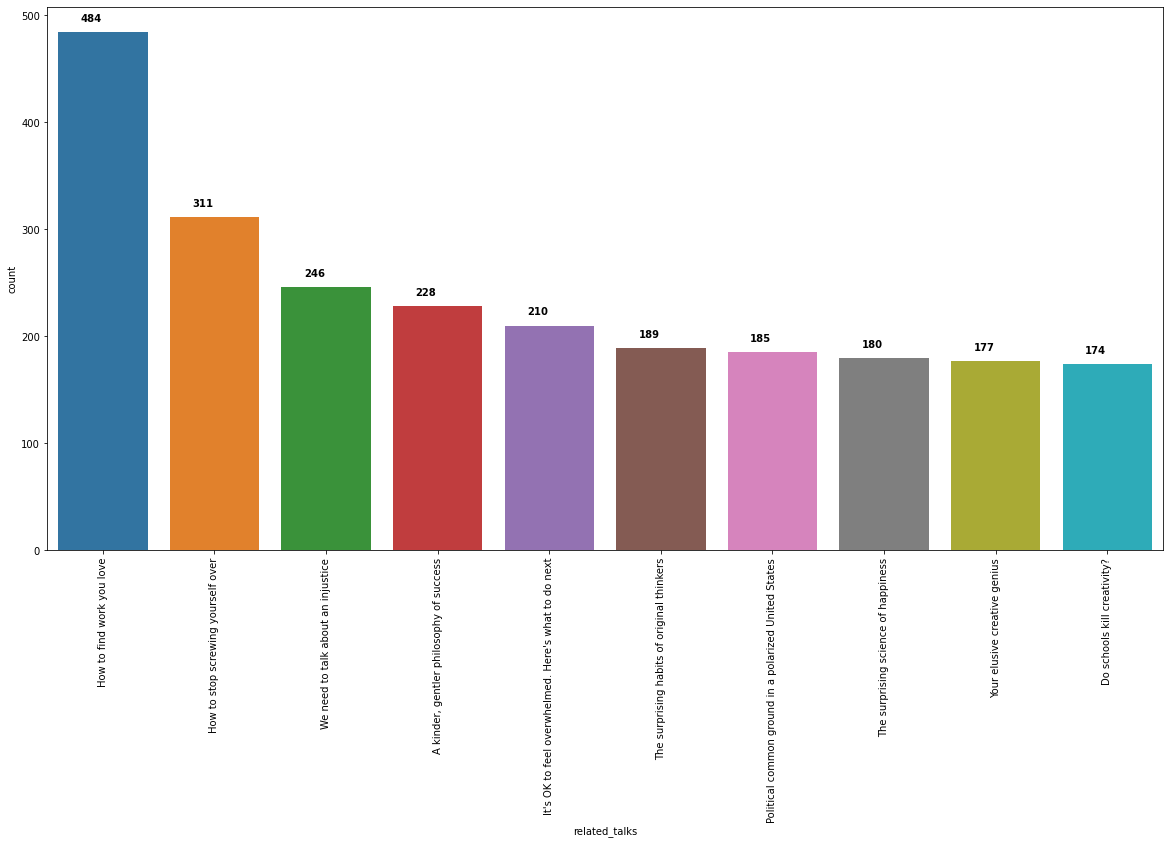

In [ ]:
#make a bar plot of the most frequent related talks categories
plt.figure(figsize=(20,10))
sns.barplot(x='related_talks', y='count', data=freq_talks_df)

#set rotation of x-axis labels
plt.xticks(rotation=90)

#show count of each related_talks category
for i, v in enumerate(freq_talks_df['count'].values):
    plt.text(i-0.2, v+10, str(v), color='black', fontweight='bold')



Numerical Columns

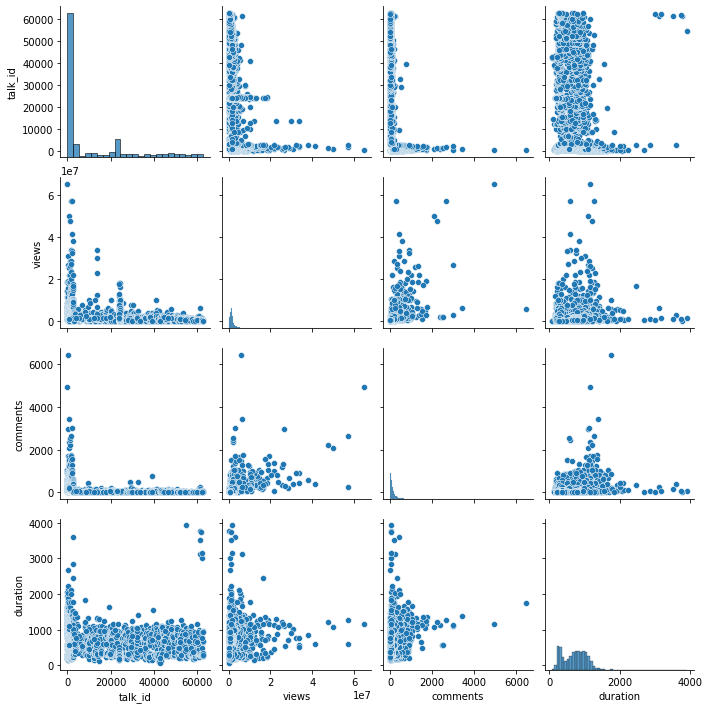

In [ ]:
#check correlation with scatterplot
sns.pairplot(df)
plt.show()

views column

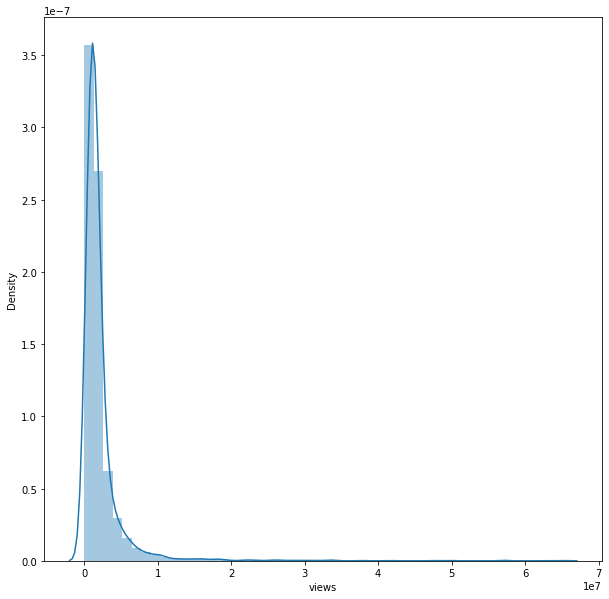

In [ ]:
#set figure size
plt.figure(figsize=(10,10))
#check for outliers of views with distribution plot
sns.distplot(df['views'])
plt.show()


Rightly skewed

In [ ]:
#print skew and kurtosis of views
print("Skew: {}".format(df['views'].skew()))
print("Kurtosis: {}".format(df['views'].kurt()))

Skew: 8.185743853972696
Kurtosis: 98.73791844100452


comments

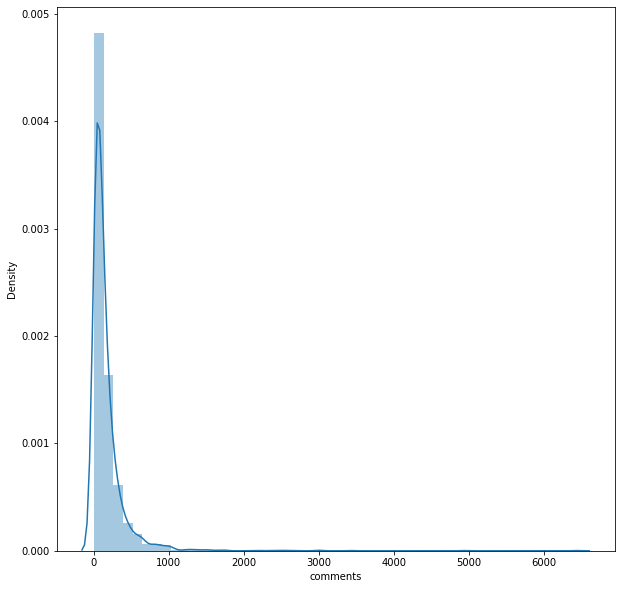

In [ ]:
#set figure size
plt.figure(figsize=(10,10))
#check for outliers ofcomments with distribution plot
sns.distplot(df['comments'])
plt.show()


rightly skewed

In [ ]:
#print skew and kurtosis of comments
print("Skew: {}".format(df['comments'].skew()))
print("Kurtosis: {}".format(df['comments'].kurt()))

Skew: 8.865357174077623
Kurtosis: 143.03538660235935


duration

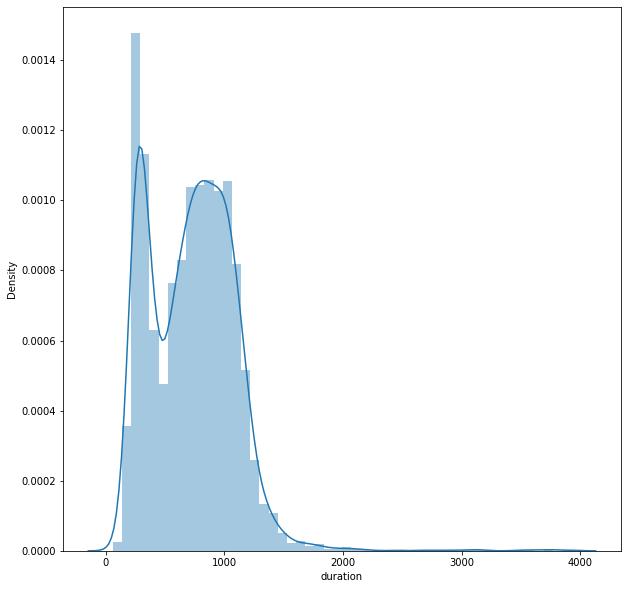

In [ ]:
#set figure size
plt.figure(figsize=(10,10))
#check for outliers of duration with distribution plot
sns.distplot(df['duration'])
plt.show()


lightly skewed to right

In [ ]:
#print skew and kurtosis of duration
print("Skew: {}".format(df['duration'].skew()))
print("Kurtosis: {}".format(df['duration'].kurt()))

Skew: 1.1856084536965332
Kurtosis: 6.84922276591617
